# Data preparation

In [2]:
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv("../dataset-progetto/train.csv", skipinitialspace=True)

- I will remove the popularity_confidence and feature_duration_ms columns.
- I will replace the missing values in the "time_signature" column with the mode.
- I will replace the missing values in the "mode" column with the mode (most frequent value).
- I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,1.0,0.0975,0.302000,0.53600,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,0.0,0.0805,0.283000,0.93400,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,NaN,0.0397,0.000089,0.80000,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal
3,Can't Look Away,269800,False,23,The Wood Brothers,One Drop of Truth,0.523,0.585,5,-5.607,1.0,0.0765,0.066400,0.00127,0.117,0.3850,140.880,269800,4.0,619.0,155.0,0.469,1.279305,bluegrass
4,Thunderground,307651,False,25,The Darkraver;DJ Vince,Happy Hardcore Top 100,0.643,0.687,7,-11.340,1.0,0.0539,0.000576,0.09690,0.299,0.6370,143.956,307652,4.0,733.0,183.0,NaN,4.067086,happy


- I will convert the duration of the tracks from ms in minutes

In [5]:
df_copy = df.copy()
df_copy["duration_m"] = df["duration_ms"] / (60 * 1000)  # Converti da millisecondi a minuti
del df_copy['duration_ms']
# df_copy.head()
# cond = df_copy['duration_m'] < 0.5
# selected_columns = df_copy[cond][['duration_m']]
# print(selected_columns)
# df_copy.iloc[11931]

Questa da vedere meglio che ci sono troppi outliers

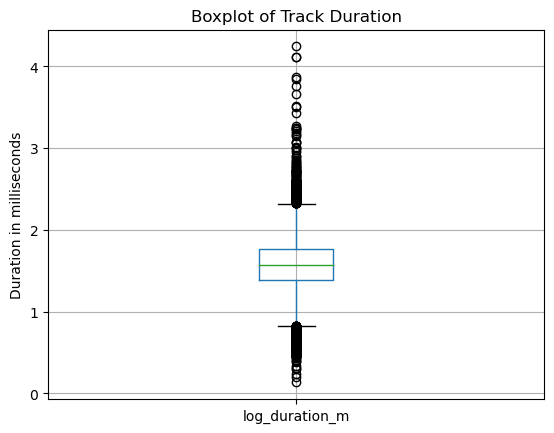

In [6]:
df_copy['log_duration_m'] = np.log(df_copy['duration_m'] + 1)
# Plot the log-transformed data
df_copy.boxplot(column=['log_duration_m'])
plt.title('Boxplot of Track Duration')
plt.ylabel('Duration in milliseconds')
plt.show()

I will sort the dataset by genre since there are 750 rows for each genre, and this ordering will enhance the readability of the dataframe.

In [7]:
df_copy = df.sort_values(by='genre')
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,NaN,0.0401,0.181,0.000000,0.0837,0.226,135.951,293107,4.0,654.0,164.0,NaN,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,NaN,0.1450,0.456,0.811000,0.1040,0.963,166.689,194973,4.0,537.0,133.0,NaN,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1.0,0.0585,0.461,0.271000,0.1410,0.731,102.809,178428,4.0,304.0,76.0,0.376,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1.0,0.0604,0.287,0.000532,0.4660,0.745,107.981,238373,4.0,427.0,106.0,NaN,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1.0,0.0533,0.930,0.001000,0.1230,0.429,87.520,221893,4.0,317.0,78.0,NaN,1.279305,afrobeat


I will replace the missing values in the "mode" column with the mode (most frequent value) and i binarize the attribute

In [8]:
df_copy['mode'] = df['mode'].fillna(df['mode'].mode()[0])
df_copy['mode'] = df_copy['mode'].astype(int) 

I will replace the missing values in the "time_signature" column with the median.

In [9]:
df_copy['time_signature'] = df['time_signature'].fillna(df['time_signature'].median())

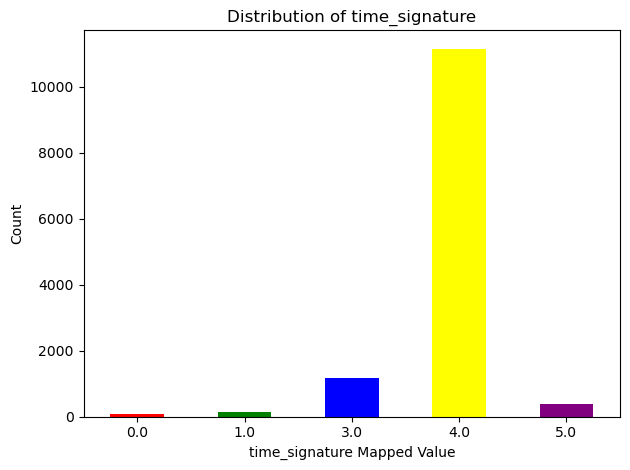

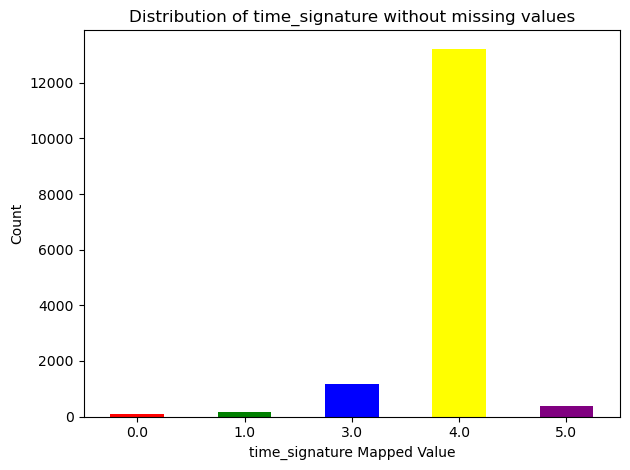

In [10]:
df['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df_copy['time_signature'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'purple'])

# Imposta le etichette e il titolo
plt.xlabel('time_signature Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of time_signature without missing values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

I will remove the popularity_confidence and feature_duration_ms columns.

In [11]:
del df_copy['popularity_confidence']

In [12]:
del df_copy['features_duration_ms']

In [13]:
df_copy.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats,n_bars,processing,genre
10264,Love Came Down,293106,False,50,Kari Jobe,Where I Find You,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0,164.0,2.725904,afrobeat
10128,PIMP,194972,False,52,Bacao Rhythm & Steel Band,55,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0,133.0,1.738916,afrobeat
5408,Soul Saxes Meeting,178428,False,22,Manu Dibango,African Voodoo,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0,76.0,1.738916,afrobeat
1304,Reino Animal,238373,False,20,Los Amigos Invisibles,Repeat After Me,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0,106.0,4.067086,afrobeat
5430,La luna de espejos,221893,False,22,Jorge Drexler,Sus primeras grabaciones 1992-1994 (La luz que...,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0,78.0,1.279305,afrobeat


In [14]:
df_copy.dtypes

name                 object
duration_ms           int64
explicit               bool
popularity            int64
artists              object
album_name           object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
n_beats             float64
n_bars              float64
processing          float64
genre                object
dtype: object

In [15]:
df_copy.shape

(15000, 22)

{0.0: 0, 1.0: 1, nan: 2}


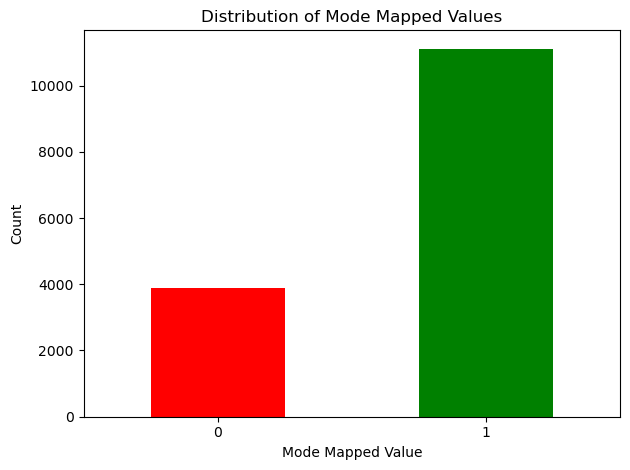

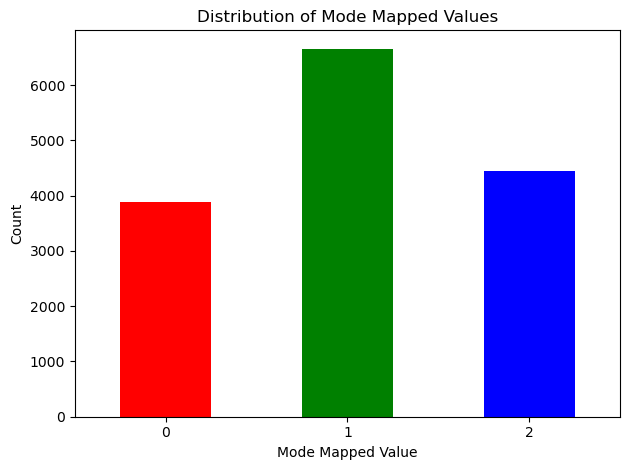

In [16]:
df_copy['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

mode_order = sorted(df['mode'].unique())
mode_order_mapping = dict(zip(mode_order, range(0, len(mode_order) + 1)))
print(mode_order_mapping)

df['mode'] = df['mode'].map(mode_order_mapping).astype(int)
# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

df['mode'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])

# Imposta le etichette e il titolo
plt.xlabel('Mode Mapped Value')
plt.ylabel('Count')
plt.title('Distribution of Mode Mapped Values')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [17]:
print(df_copy.isnull().sum())

name                0
duration_ms         0
explicit            0
popularity          0
artists             0
album_name          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
n_beats             0
n_bars              0
processing          0
genre               0
dtype: int64


In [18]:
correlations = df_copy.corr(method="pearson")
print(correlations["mode"])

duration_ms        -0.017485
explicit           -0.032567
popularity          0.058280
danceability       -0.061064
energy             -0.060875
key                -0.130170
loudness           -0.027032
mode                1.000000
speechiness        -0.047440
acousticness        0.066816
instrumentalness   -0.061329
liveness            0.013532
valence            -0.001951
tempo              -0.011408
time_signature     -0.015951
n_beats            -0.023168
n_bars             -0.019885
processing          0.206992
Name: mode, dtype: float64


## Data cleaning

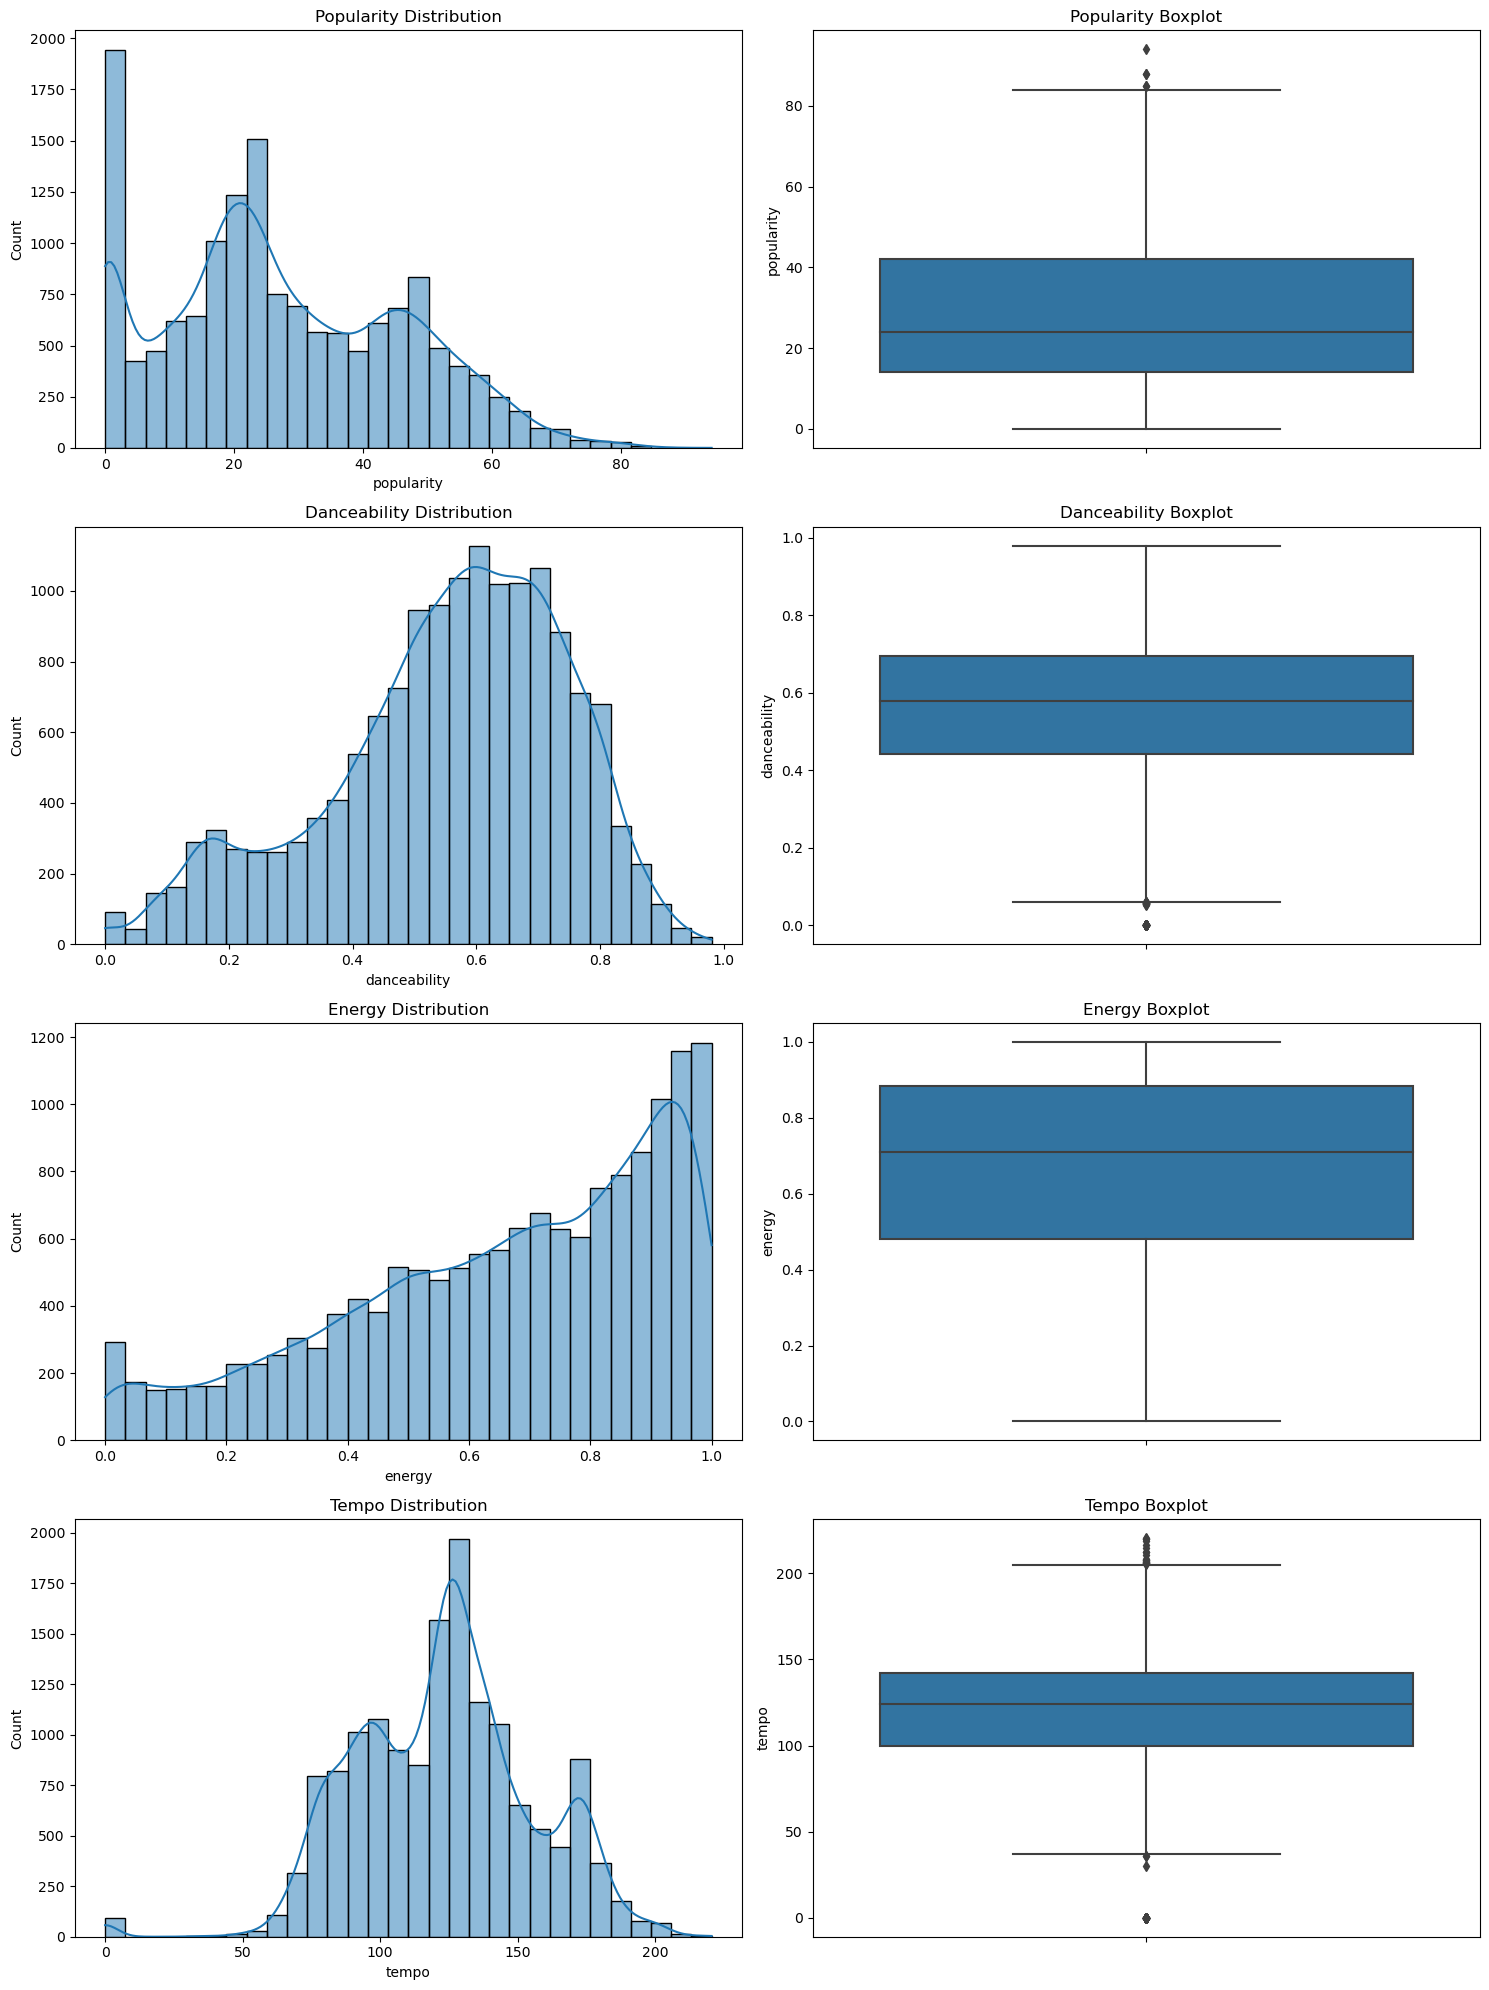

In [19]:

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

# Histograms on the left
sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Popularity Distribution')

sns.histplot(df['danceability'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Danceability Distribution')

sns.histplot(df['energy'], bins=30, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Energy Distribution')

sns.histplot(df['tempo'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Tempo Distribution')

# Boxplots on the right
sns.boxplot(y=df['popularity'], ax=axes[0, 1])
axes[0, 1].set_title('Popularity Boxplot')

sns.boxplot(y=df['danceability'], ax=axes[1, 1])
axes[1, 1].set_title('Danceability Boxplot')

sns.boxplot(y=df['energy'], ax=axes[2, 1])
axes[2, 1].set_title('Energy Boxplot')

sns.boxplot(y=df['tempo'], ax=axes[3, 1])
axes[3, 1].set_title('Tempo Boxplot')

plt.tight_layout()
plt.show()

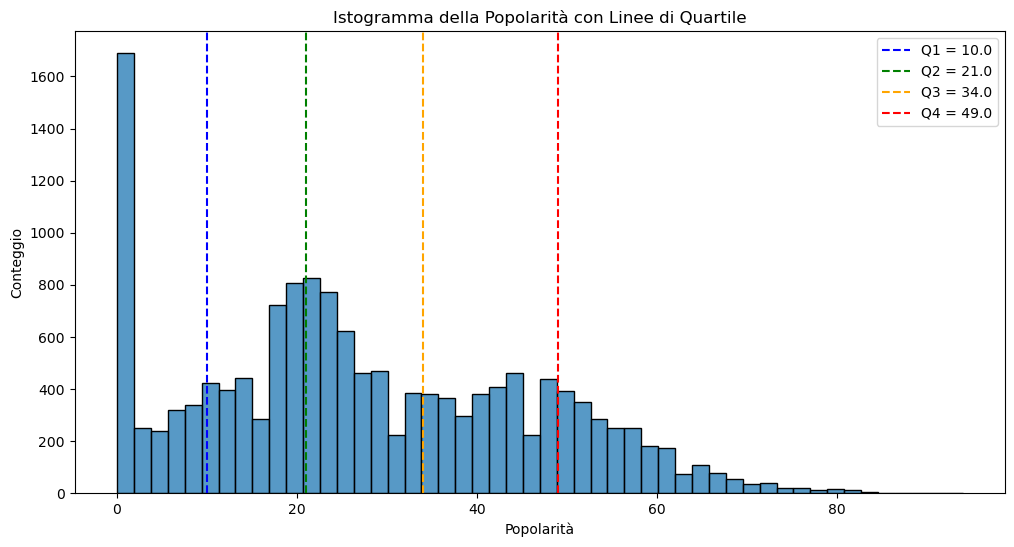

In [20]:
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.65)
Q4 = df['popularity'].quantile(0.85)
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=50, kde=False)
plt.axvline(x=Q1, color='blue', linestyle='--', label=f'Q1 = {Q1}')
plt.axvline(x=Q2, color='green', linestyle='--', label=f'Q2 = {Q2}')
plt.axvline(x=Q3, color='orange', linestyle='--', label=f'Q3 = {Q3}')
plt.axvline(x=Q4, color='red', linestyle='--', label=f'Q4 = {Q4}')
plt.xlabel('Popolarità')
plt.ylabel('Conteggio')
plt.title('Istogramma della Popolarità con Linee di Quartile')
plt.legend()
plt.show()

49.0
   popularity   popularity_category
0          46       High Popularity
1           0   Very Low Popularity
2           3   Very Low Popularity
3          23     Medium Popularity
4          25     Medium Popularity
5          32     Medium Popularity
6          27     Medium Popularity
7          64  Very High Popularity
8          45       High Popularity
9          21        Low Popularity


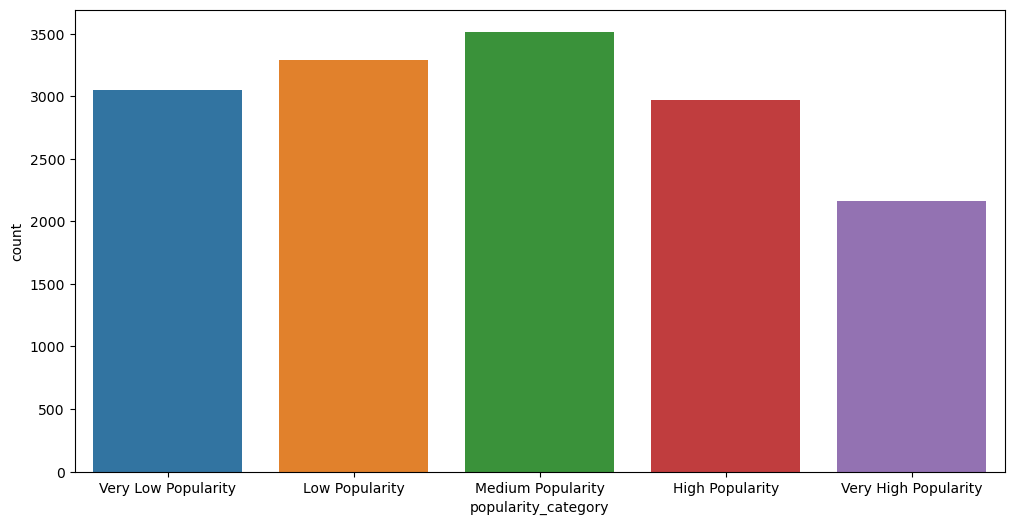

(-1.0, 10.0]    3052
(10.0, 21.0]    3293
(21.0, 34.0]    3517
(34.0, 49.0]    2973
(49.0, 94.0]    2165
Name: popularity, dtype: int64


In [21]:
Q1 = df['popularity'].quantile(0.2)
Q2 = df['popularity'].quantile(0.4)
Q3 = df['popularity'].quantile(0.65)
Q4 = df['popularity'].quantile(0.85)
print(Q4)
bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']

# Assicurati che df_copy sia definito. Se no, crea una copia di df
df_copy = df.copy()

# Crea una nuova colonna 'popularity_category' con i valori discretizzati
df_copy['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)

# Visualizza le prime 10 righe per le colonne 'popularity' e 'popularity_category'
print(df_copy[["popularity", "popularity_category"]].head(10))

# Crea un grafico a barre per 'popularity_category'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x="popularity_category")
plt.show()
bin_counts = pd.cut(df['popularity'], bins=bin_edges).value_counts().sort_index()
print(bin_counts)

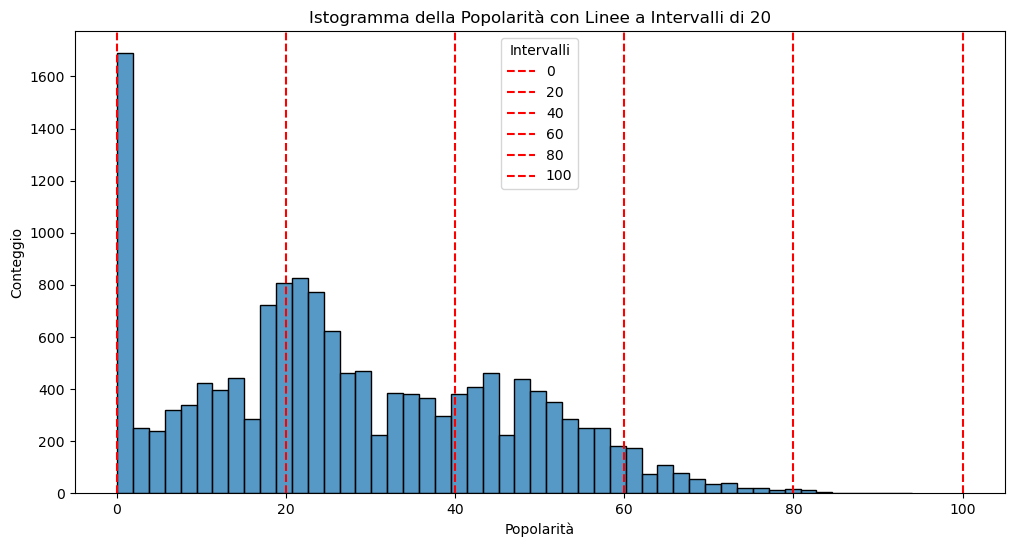

(-0.001, 20.0]    5918
(20.0, 40.0]      4981
(40.0, 60.0]      3445
(60.0, 80.0]       634
(80.0, 100.0]       22
Name: popularity, dtype: int64


In [22]:
intervals = range(0, 101, 20)  # Questo crea una lista di valori da 0 a 100 con un incremento di 20

# Visualizziamo un istogramma per la popolarità con le linee dei quartili sostituite dalle linee degli intervalli
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=50, kde=False)

# Aggiungiamo linee verticali per ogni intervallo
for interval in intervals:
    plt.axvline(x=interval, color='red', linestyle='--', label=f'{interval}')

plt.xlabel('Popolarità')
plt.ylabel('Conteggio')
plt.title('Istogramma della Popolarità con Linee a Intervalli di 20')
plt.legend(title='Intervalli')
plt.show()

# Calcoliamo il numero di canzoni in ogni gruppo di popolarità
counts = df['popularity'].value_counts(bins=intervals, sort=False)
counts = counts.sort_index()
print(counts)

   popularity popularity_range
0          46            41-60
1           0             0-20
2           3             0-20
3          23            21-40
4          25            21-40
5          32            21-40
6          27            21-40
7          64            61-80
8          45            41-60
9          21            21-40


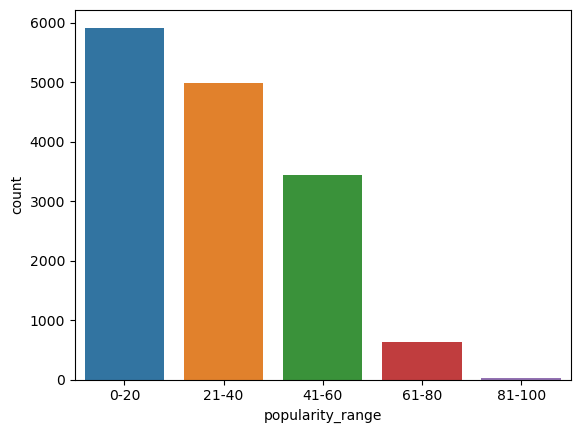

In [23]:
# Definisci i bin edges e le etichette
bin_edges = [0, 20, 40, 60, 80, 100]
bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Crea una nuova colonna 'popularity_range' con i valori discretizzati
df['popularity_range'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Visualizza le prime 10 righe per la nuova colonna 'popularity_range'
print(df[['popularity', 'popularity_range']].head(10))

# Crea un grafico a barre per 'popularity_range'
sns.countplot(data=df, x='popularity_range')
plt.show()

# Salvare il DataFrame se necessario
# df.to_csv('path_to_save.csv', index=False)


In [24]:
df_copy.drop_duplicates(inplace=True)